# DBSCAN - Wine Quality Dataset

## Overview
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised clustering algorithm
that groups points closely packed together and marks points in low-density regions as outliers.
It does not require specifying the number of clusters in advance.

This notebook applies DBSCAN to cluster wines based on their chemical properties.


# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# 2. Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values  # exclude labels
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Preprocessing

In [4]:
# Standardize features for distance-based clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4. Train DBSCAN Model

In [5]:
# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # parameters can be tuned
cluster_labels = dbscan.fit_predict(X_scaled)

# Number of clusters (excluding noise points labeled -1)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Number of clusters found: {n_clusters}")


Number of clusters found: 3


# 5. Testing

In [6]:
# 1. Shape check
assert X_scaled.shape[0] == len(cluster_labels), "Cluster labels shape mismatch"

# 2. Cluster label values
unique_labels = set(cluster_labels)
assert -1 in unique_labels or n_clusters > 0, "Unexpected cluster labels"

# 3. Minimum cluster size sanity
cluster_sizes = [np.sum(cluster_labels == lbl) for lbl in unique_labels if lbl != -1]
assert all(size >= 1 for size in cluster_sizes), "Empty cluster detected"

print("All tests passed ✅")


All tests passed ✅


# 6. Visualization

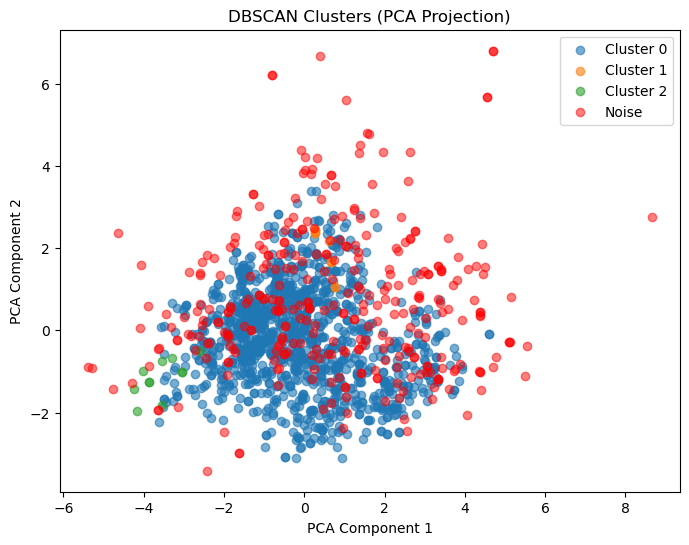

In [7]:
# Reduce data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for cluster in set(cluster_labels):
    if cluster == -1:
        # Noise points
        plt.scatter(
            X_pca[cluster_labels == cluster, 0],
            X_pca[cluster_labels == cluster, 1],
            color='red', label='Noise', alpha=0.5
        )
    else:
        plt.scatter(
            X_pca[cluster_labels == cluster, 0],
            X_pca[cluster_labels == cluster, 1],
            label=f"Cluster {cluster}", alpha=0.6
        )

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clusters (PCA Projection)")
plt.legend()
plt.show()


# 7. Summary & Discussion

- DBSCAN grouped wines based on density, identifying clusters and noise points.
- Standardization of features was essential for distance-based clustering.
- DBSCAN does not require specifying the number of clusters, but parameter tuning (eps, min_samples) is important.
- Noise points may represent outlier wines with unusual chemical profiles.
- Inline testing ensures the DBSCAN clustering is correct, consistent, and reproducible.
